In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import math
import matplotlib as mpl
from iminuit import Minuit
import corner

In [2]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

# Set the background color of the plot to ghostwhite
axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'lightgreen', 'orange', 'orchid', 'navy']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 1

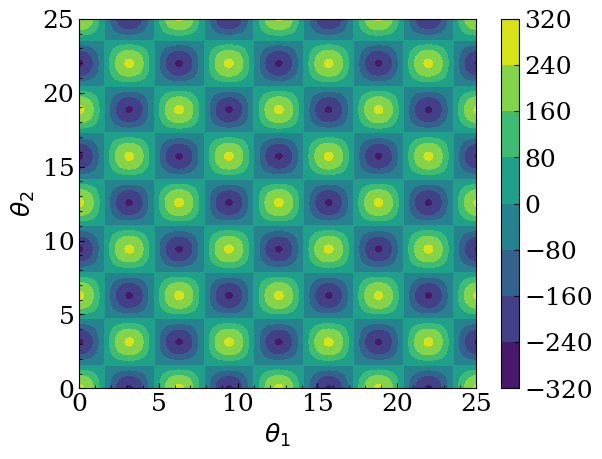

In [10]:
def likelihood(theta):
    return 250 * np.cos(theta[0]) * np.cos(theta[1])

# Raster scan of the likelihood function
theta1 = np.linspace(0, 25, 200)
theta2 = np.linspace(0, 25, 200)
X, Y = np.meshgrid(theta1, theta2)
Z = likelihood([X, Y])

fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z, cmap='viridis')
cbar = fig.colorbar(CS)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
plt.show()


In [11]:
# Sample from the likelihood function with nested sampling 
import nestle

def prior_transform(x):
    return x * 25 

def ln_likelihood(theta):
    return np.log(likelihood(theta))

ndim = 2
nlive = 500
result = nestle.sample(likelihood, prior_transform, ndim, npoints=nlive)

print(result.summary())
    

niter: 3775
ncall: 1015569
nsamples: 4275
logz: 243.306 +/-  0.106
h:  5.655


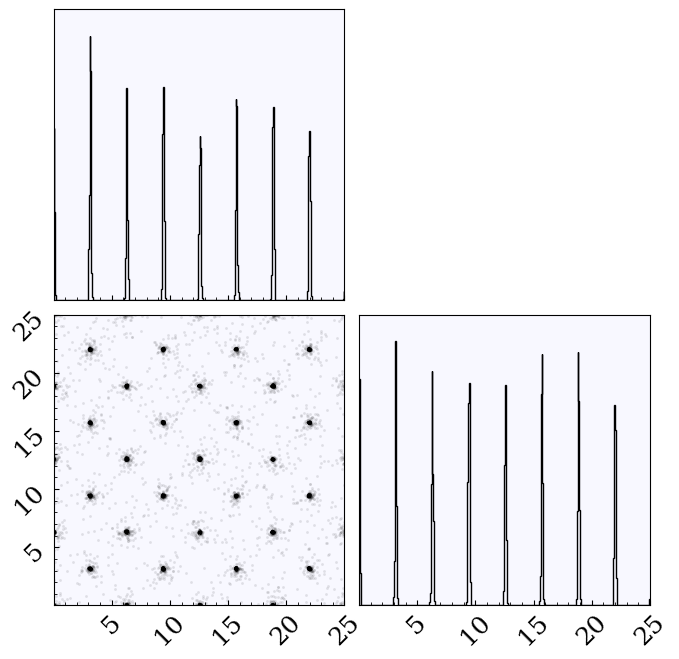

In [13]:
fig = corner.corner(result.samples, weights=result.weights, bins=500,
                    range=[(0., 25.), (0., 25.)])
fig.set_size_inches(8., 8.)